In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
data = pd.read_csv(r'./Data/DescriptorsFinal.csv',skipinitialspace = True)

In [4]:
data

,Name,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,Type
0,A922500,1,-1.1975,1.434006,41.5663,67.171032,18,19,56,32,...,65.422713,2.044460,16.079951,9.971769,6.108182,3629,48,6.720,166,Yes
1,colestipol,0,-2.6682,7.119291,56.0418,34.916239,0,0,36,13,...,24.828511,1.909885,13.660982,0.000000,13.660982,364,10,-2.500,46,Yes
2,DB00159,1,2.1145,4.471110,98.9968,56.807790,0,0,52,22,...,42.661553,1.939162,4.764175,4.764175,0.000000,1752,19,8.022,84,Yes
3,DB00175,1,-1.8959,3.594437,105.0247,70.098548,0,0,66,30,...,59.280036,1.976001,17.895489,17.895489,0.000000,2600,46,2.275,148,Yes
4,DB00227,0,-0.0992,0.009841,105.6455,70.254548,0,0,65,29,...,58.394554,2.013605,13.655538,13.655538,0.000000,2246,47,4.574,150,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,73665,0,1.2492,1.560501,51.3554,48.512688,11,11,39,23,...,45.691631,1.986593,22.911202,5.622948,9.700134,1313,32,2.912,112,No
130,252372,0,1.1073,1.226113,94.1155,62.463376,0,0,57,25,...,51.228838,2.049154,7.910825,7.910825,0.000000,1342,52,4.988,146,No
131,6300,0,1.2740,1.623076,88.9448,55.474204,0,0,50,22,...,45.296451,2.058930,5.016011,5.016011,0.000000,907,48,4.520,134,No
132,7108,0,0.1702,0.028968,11.0935,31.121137,12,12,23,14,...,29.510038,2.107860,6.343033,0.000000,3.171517,279,21,3.911,76,No


In [5]:
data.fillna(0,inplace = True)

In [6]:
data

,Name,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,Type
0,A922500,1,-1.1975,1.434006,41.5663,67.171032,18,19,56,32,...,65.422713,2.044460,16.079951,9.971769,6.108182,3629,48,6.720,166,Yes
1,colestipol,0,-2.6682,7.119291,56.0418,34.916239,0,0,36,13,...,24.828511,1.909885,13.660982,0.000000,13.660982,364,10,-2.500,46,Yes
2,DB00159,1,2.1145,4.471110,98.9968,56.807790,0,0,52,22,...,42.661553,1.939162,4.764175,4.764175,0.000000,1752,19,8.022,84,Yes
3,DB00175,1,-1.8959,3.594437,105.0247,70.098548,0,0,66,30,...,59.280036,1.976001,17.895489,17.895489,0.000000,2600,46,2.275,148,Yes
4,DB00227,0,-0.0992,0.009841,105.6455,70.254548,0,0,65,29,...,58.394554,2.013605,13.655538,13.655538,0.000000,2246,47,4.574,150,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,73665,0,1.2492,1.560501,51.3554,48.512688,11,11,39,23,...,45.691631,1.986593,22.911202,5.622948,9.700134,1313,32,2.912,112,No
130,252372,0,1.1073,1.226113,94.1155,62.463376,0,0,57,25,...,51.228838,2.049154,7.910825,7.910825,0.000000,1342,52,4.988,146,No
131,6300,0,1.2740,1.623076,88.9448,55.474204,0,0,50,22,...,45.296451,2.058930,5.016011,5.016011,0.000000,907,48,4.520,134,No
132,7108,0,0.1702,0.028968,11.0935,31.121137,12,12,23,14,...,29.510038,2.107860,6.343033,0.000000,3.171517,279,21,3.911,76,No


In [7]:
data.iloc[0:50].describe()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,0.600000,0.103062,5.452909,63.078496,60.688393,10.140000,10.540000,52.880000,27.920000,24.960000,...,8.141725,55.900345,1.995809,18.406705,10.537302,4.093793,2833.68000,42.980000,4.958200,142.920000
std,0.670059,2.356556,11.908181,30.905187,20.953731,7.761785,8.197088,19.253031,9.997632,11.520984,...,3.027461,20.521900,0.046796,9.241652,5.463729,4.849314,2510.15054,19.566204,3.583184,56.051303
min,0.000000,-7.885400,0.003505,7.219300,16.597965,0.000000,0.000000,14.000000,9.000000,5.000000,...,4.717802,17.528614,1.889152,2.414214,0.000000,0.000000,88.00000,9.000000,-2.500000,40.000000
25%,0.000000,-1.188975,0.577356,44.481375,50.040507,1.250000,1.250000,37.000000,21.000000,17.250000,...,6.534568,40.900764,1.967940,12.457292,7.595654,0.000000,927.25000,28.000000,2.730750,100.000000
50%,1.000000,-0.176850,1.514663,55.965650,59.828153,12.000000,12.000000,52.000000,28.000000,24.000000,...,7.843479,56.530962,2.003079,16.533627,10.329443,3.054602,2249.50000,44.000000,4.281000,144.000000
75%,1.000000,1.233900,4.219752,79.288525,73.910505,15.750000,17.000000,66.000000,32.750000,33.000000,...,8.396952,65.081421,2.034773,23.337904,12.893674,6.460240,3528.75000,51.750000,6.617500,166.000000
max,3.000000,7.533200,62.179533,165.089800,101.557341,24.000000,26.000000,87.000000,50.000000,58.000000,...,22.191049,102.378738,2.115324,40.323875,28.311049,19.478988,11632.00000,87.000000,14.507000,272.000000


In [8]:
data.iloc[51:].describe()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,...,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,0.144578,-0.055558,2.198014,71.444539,61.026563,8.096386,8.265060,53.819277,27.144578,26.674699,...,7.484337,54.641582,2.013075,18.325765,9.601105,6.401849,3035.506024,44.554217,3.630976,142.240964
std,0.386748,1.490535,3.605325,49.605461,30.339582,6.830017,7.076385,28.720752,12.826357,16.615529,...,1.484015,25.432722,0.052836,11.891421,8.095113,6.807633,5428.673000,24.066601,2.707076,65.626733
min,0.000000,-3.400700,0.000085,11.093500,17.945137,0.000000,0.000000,18.000000,9.000000,6.000000,...,5.634078,16.327527,1.814170,4.753096,0.000000,0.000000,96.000000,8.000000,-3.628000,36.000000
25%,0.000000,-1.022950,0.131241,42.503450,45.692171,0.000000,0.000000,40.000000,21.000000,18.500000,...,6.343860,41.821756,1.979460,8.646263,4.917137,0.000000,895.500000,30.000000,2.011500,104.000000
50%,0.000000,0.023300,0.855625,61.462300,55.474204,6.000000,6.000000,50.000000,23.000000,26.000000,...,7.305611,45.962181,2.012579,15.681640,7.861877,5.270526,1225.000000,39.000000,3.451000,126.000000
75%,0.000000,0.529250,2.500546,84.750450,66.327118,12.000000,12.000000,57.000000,29.500000,29.500000,...,8.093011,60.016330,2.049278,24.032189,12.591440,9.133191,2480.000000,52.500000,4.890000,155.000000
max,2.000000,4.291700,18.418689,318.959400,204.858023,29.000000,31.000000,196.000000,85.000000,111.000000,...,12.823862,163.824466,2.111438,64.851242,37.725169,34.517477,37337.000000,150.000000,10.783000,412.000000


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['Type'])

LabelEncoder()

In [10]:
data['Type'] = le.transform(data['Type'])

In [11]:
X = data.iloc[:,1:1445]
y = data.iloc[:,-1]

In [12]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y)

In [13]:
X_train.iloc[21]['ATS1s']

135.9444444

In [14]:
# Holdout validation
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y, random_state = 100)
forest = RandomForestClassifier(n_estimators = 1000,max_features = 150,min_samples_leaf = 15,oob_score = True, random_state = 1)
forest.fit(X_train,y_train)
print('Accuracy: Training Set = {}'.format(forest.score(X_train,y_train)))
print('Accuracy: Test Set = {}'.format(forest.score(X_test,y_test)))

Accuracy: Training Set = 0.8924731182795699
Accuracy: Test Set = 0.7804878048780488


In [18]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kFold = KFold(n_splits=5,random_state = 10,shuffle = True)
scores = cross_val_score(forest,X,y,cv = kFold)
print(scores.mean(),scores.std())
print('Scores:',scores)

0.7689458689458689 0.07833669958142776
Scores: [0.7037037  0.88888889 0.77777778 0.66666667 0.80769231]


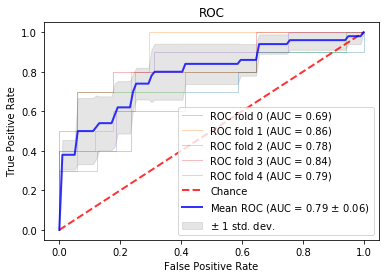

In [20]:



# random state for assigning random seed value

random_state = np.random.RandomState(0)

# #############################################################################
# Classification and ROC analysis


cv = StratifiedKFold(n_splits=5)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    forest.fit(X.iloc[train],y.iloc[train])
    viz = plot_roc_curve(forest, X.iloc[test], y.iloc[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC")
ax.legend(loc="lower right")

plt.savefig("ROC_Updated.png",dpi = 1200)
plt.show()

In [28]:
Pr = pd.read_csv(r'./Data/Descriptors_PredictionSet.csv',skipinitialspace = True)
Pr.fillna(0,inplace = True)

In [29]:
Pr

,Name,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,DB00125,1,-2.1807,4.755452,36.4993,25.899102,0,0,26,12,...,6.696603,22.320911,1.860076,14.832549,4.740395,10.092154,247.0,11,-2.924,48
1,DB00155,1,-2.3389,5.470453,35.2422,24.934309,0,0,25,12,...,7.003828,22.320911,1.860076,14.832549,7.120632,7.711917,247.0,11,-3.909,48
2,163,0,3.2935,10.847142,104.8267,85.983650,6,6,81,31,...,5.313347,61.142465,1.972338,5.615079,5.615079,0.000000,3414.0,48,10.938,154
3,DB00185,0,-0.1976,0.039046,50.5442,33.737481,0,0,30,13,...,6.636770,27.113657,2.085666,9.535937,3.061198,3.462387,213.0,19,1.295,76
4,201,0,-0.4311,0.185847,34.8722,26.751930,5,5,24,14,...,8.086682,27.800102,1.985722,17.761592,5.042091,12.719500,258.0,25,-0.625,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,DB09068,0,1.5138,2.291590,43.8445,51.449446,12,12,43,21,...,6.933730,43.095997,2.052190,9.632059,0.000000,6.483503,936.0,31,4.664,108
126,DB09073,0,-2.1537,4.638424,74.9835,70.880997,12,12,62,33,...,7.213521,68.291227,2.069431,27.670757,5.013522,22.657235,3345.0,57,1.689,180
127,DB09076,0,-1.8766,3.521628,50.7358,76.414962,18,18,66,32,...,6.488772,66.496442,2.078014,9.513794,5.686744,3.827050,3090.0,57,8.586,176
128,DB09078,0,-0.3562,0.126878,43.1321,59.417067,16,17,49,30,...,8.696112,60.901862,2.030062,24.984101,10.932898,11.485082,2706.0,48,4.175,160


In [30]:
Yp = forest.predict(Pr.iloc[:,1:1445])
np.unique(Yp,return_counts = True)


(array([0, 1]), array([120,  10], dtype=int64))

In [31]:
Yp2 = forest.predict(Pr.iloc[:,1:1445])
np.unique(Yp2,return_counts = True)
Yp2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [32]:
ProbPredSet = forest.predict_proba(Pr.iloc[:,1:1445])
ProbPredSet[:,0]

array([0.664656  , 0.67094197, 0.53080159, 0.80189629, 0.70593858,
       0.77897253, 0.64035194, 0.80586397, 0.61154004, 0.71376432,
       0.69093487, 0.63041539, 0.58223887, 0.8188666 , 0.70553616,
       0.69754129, 0.38340971, 0.6842893 , 0.70500237, 0.73587513,
       0.68148317, 0.60494737, 0.74057046, 0.44372146, 0.73923649,
       0.76495306, 0.74801473, 0.78720915, 0.76266919, 0.6783667 ,
       0.49159812, 0.66757237, 0.75173114, 0.66648029, 0.74252127,
       0.68488883, 0.40573006, 0.79486817, 0.68952621, 0.67642826,
       0.57217829, 0.64722409, 0.40573006, 0.80967245, 0.77380764,
       0.65551467, 0.59859012, 0.74252127, 0.58597976, 0.59927332,
       0.66434727, 0.68029107, 0.70566112, 0.55600285, 0.74288662,
       0.57322316, 0.67630886, 0.73426664, 0.75265905, 0.72299563,
       0.69767627, 0.59685834, 0.74864594, 0.85198848, 0.80839075,
       0.75959331, 0.76016227, 0.67604331, 0.69455561, 0.48276843,
       0.62142136, 0.73072573, 0.79381315, 0.67572109, 0.77581

In [33]:
ProposedCandidates = pd.DataFrame({'Name':Pr.iloc[:,0],'IsCandidate':Yp2,'Classifier Probability Class 0':ProbPredSet[:,0],'Classifier Probability Class 1':ProbPredSet[:,1]})
ProposedCandidates
#ProposedCandidates.to_csv('CandidatePredictions_Proba.csv')

,Name,IsCandidate,Classifier Probability Class 0,Classifier Probability Class 1
0,DB00125,0,0.664656,0.335344
1,DB00155,0,0.670942,0.329058
2,163,0,0.530802,0.469198
3,DB00185,0,0.801896,0.198104
4,201,0,0.705939,0.294061
...,...,...,...,...
125,DB09068,0,0.742999,0.257001
126,DB09073,0,0.679037,0.320963
127,DB09076,0,0.591407,0.408593
128,DB09078,1,0.406470,0.593530


In [56]:
featureImportance =  pd.DataFrame(forest.feature_importances_,index = X.columns,columns = (['InterTree Variability'])).sort_values('InterTree Variability',ascending = False)

In [59]:
featureImportance.to_excel("featureImportances.xls")

In [46]:
from matplotlib import pyplot as plt
# FeatureImportances = featureImportance.head(20)
# FeatureImportances.plot.barh(figsize = (15,15))
#plt.savefig('Feature Importance.jpg')

In [34]:
y_score = forest.predict_proba(X_test)
y_score

array([[0.80459187, 0.19540813],
       [0.43277903, 0.56722097],
       [0.84601735, 0.15398265],
       [0.69071558, 0.30928442],
       [0.44637152, 0.55362848],
       [0.54401804, 0.45598196],
       [0.62381065, 0.37618935],
       [0.66561299, 0.33438701],
       [0.76495306, 0.23504694],
       [0.57805718, 0.42194282],
       [0.46582373, 0.53417627],
       [0.39223498, 0.60776502],
       [0.76437123, 0.23562877],
       [0.41676515, 0.58323485],
       [0.66204177, 0.33795823],
       [0.71588706, 0.28411294],
       [0.63132118, 0.36867882],
       [0.63745863, 0.36254137],
       [0.81367863, 0.18632137],
       [0.49719377, 0.50280623],
       [0.73567663, 0.26432337],
       [0.53728292, 0.46271708],
       [0.75162234, 0.24837766],
       [0.67642826, 0.32357174],
       [0.63870478, 0.36129522],
       [0.47155223, 0.52844777],
       [0.57586486, 0.42413514],
       [0.73587513, 0.26412487],
       [0.45030101, 0.54969899],
       [0.3797126 , 0.6202874 ],
       [0.

In [42]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_score[:,1])

0.7743589743589744

In [47]:
YSC = forest.predict_proba(X)
auc = roc_auc_score(y,YSC[:,1])
auc

0.9241666666666667

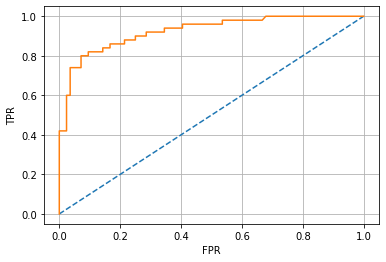

In [48]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y,YSC[:,1])
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr, tpr, label='ROC curve: AUC={0:0.2f}'.format(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
#plt.ylim([0.0, 1.05])
#plt.xlim([0.0, 1.0])
plt.grid(True)
#plt.savefig('Receiver Operating Characteristic.jpg')
plt.show()


In [31]:
Y = forest.predict(X)
from sklearn.metrics import confusion_matrix
confusion_matrix(y,Y)

array([[81,  3],
       [14, 36]], dtype=int64)

In [32]:
Y_Test = forest.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_Test))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        26
           1       0.85      0.73      0.79        15

    accuracy                           0.85        41
   macro avg       0.85      0.83      0.84        41
weighted avg       0.85      0.85      0.85        41



In [33]:
Y_Train = forest.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_train,Y_Train))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        58
           1       0.96      0.71      0.82        35

    accuracy                           0.88        93
   macro avg       0.91      0.85      0.87        93
weighted avg       0.89      0.88      0.88        93



In [34]:
Yprediction = forest.predict(X)
from sklearn.metrics import classification_report
print(classification_report(y,Yprediction))

              precision    recall  f1-score   support

           0       0.85      0.96      0.91        84
           1       0.92      0.72      0.81        50

    accuracy                           0.87       134
   macro avg       0.89      0.84      0.86       134
weighted avg       0.88      0.87      0.87       134

